---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [85]:
import pandas as pd
import re
import numpy as np

In [86]:
gdp = pd.read_csv("world_bank.csv", 
                     header=4, 
                     index_col=0)


In [87]:
index_list = gdp.index.tolist()  #extracting the index as list, changing the value then reassigning to index
index_list = [country.replace('Korea, Rep.', 'South Korea') for country in index_list]
index_list = [country.replace('Iran, Islamic Rep.', 'Iran') for country in index_list]
index_list = [country.replace('Hong Kong SAR, China', 'Hong Kong') for country in index_list]
gdp.index = index_list
gdp.index.name = 'Country'
gdp.reset_index(level=0, inplace=True)

In [88]:
gdp

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
energy = pd.read_excel("Energy Indicators.xls", 
                     header=17, 
                     names=['Energy Supply', 'Energy Supply per Capita', '% Renewable'],
                     index_col=0,
                     parse_cols=[2,3,4,5],
                     skip_footer=38)
energy.index.name = 'Country'

In [90]:
'''Changing strings to numeric + ... to NaN'''
for col in list(energy):  # make all column values numeric (coerce --> NaN)
    energy[col] = pd.to_numeric(energy[col], errors='coerce')
'''Peta --> Gigajoules'''
energy['Energy Supply'] *= 1000000
'''extracting the index as list, changing the value then reassigning to index'''

index_list = energy.index.tolist()

dico = {"Republic of Korea": "South Korea"}
# Not to be done for exercise:
#dico = {"Republic of Korea": "South Korea", "Réunion": "Reunion", "Côte d'Ivoire": "Cote d'Ivoire"}
for index, item in enumerate(index_list):
    if item in dico:
        index_list[index]=dico[item]

#index_list = [country.replace('Republic of Korea', 'South Korea') for country in index_list]
index_list = [country.replace('United States of America', 'United States') for country in index_list]
index_list = [country.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom') for country in index_list]
index_list = [country.replace('China, Hong Kong Special Administrative Region', 'Hong Kong') for country in index_list]
index_list = [re.sub(r'\d', '', country) for country in index_list]
index_list = [re.sub(r'\s*\(.*\)', '', country) for country in index_list] #removing parenthesis
energy.index = index_list
energy.index.name = 'Country'
energy.reset_index(level=0, inplace=True)

In [91]:
ScimEn = pd.read_excel("scimagojr-3.xlsx", 
                     header=0, 
                     index_col=1)
ScimEn

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


In [92]:
countries_inner = pd.merge(energy, gdp, how='inner', left_on='Country', right_on='Country')
countries_inner = pd.merge(countries_inner, ScimEn, how='inner', left_on='Country', right_index='Country')

In [93]:
countries_inner = countries_inner.set_index('Country')

In [94]:
cols = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
countries_inner = countries_inner[cols]

In [95]:
countries_15 = countries_inner[countries_inner.Rank <= 15].sort_values('Rank')


In [96]:
countries_15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [97]:
def answer_one():
    answer = countries_15.copy()
    return answer

In [98]:
# For question 2
countries_outer = pd.merge(energy, gdp, how='outer', left_on='Country', right_on='Country')
countries_outer = pd.merge(countries_outer, ScimEn, how='outer', left_on='Country', right_index='Country')

In [99]:
countries_outer = countries_outer.set_index('Country')

In [100]:
print(len(energy), len(gdp), len(ScimEn))
print(len(countries_outer), len(countries_inner), len(countries_outer)-len(countries_inner))

227 264 191
318 162 156


In [101]:
pd.set_option('display.max_rows', len(countries_outer))
print(countries_outer)
pd.reset_option('display.max_rows')

                                                    Energy Supply  \
Country                                                             
Afghanistan                                          3.210000e+08   
Albania                                              1.020000e+08   
Algeria                                              1.959000e+09   
American Samoa                                                NaN   
Andorra                                              9.000000e+06   
Angola                                               6.420000e+08   
Anguilla                                             2.000000e+06   
Antigua and Barbuda                                  8.000000e+06   
Argentina                                            3.378000e+09   
Armenia                                              1.430000e+08   
Aruba                                                1.200000e+07   
Australia                                            5.386000e+09   
Austria                           

In [102]:
#replace get_energy() with the variable or the function reading/cleaning energy
#energy = get_Energy()

energy['original'] = pd.read_excel('Energy Indicators.xls',
                                   usecols=[1],
                                   index_col=0).loc['Afghanistan':'Zimbabwe'].index.tolist()

enDict = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
res = ''
# check for trailing whitespace
tws = energy[energy['Country'].str.contains('\s+$')]
res += "Trailing whitespace Test: "
res += ['Passed\n', 'Failed\n {}\n'.format(tws['Country'])][len(tws) > 0]

# check parentheses ()
prth = energy[
    (energy['Country'].str.contains('\(')) | (
        energy['Country'].str.contains('\)'))]
res += "Parentheses Test: "
res += ['Passed\n', 'Failed\n {}\n'.format(prth['Country'])][len(prth) > 0]

# check footnote digits
dg = energy[energy['Country'].str.contains('\d+$')]
res += "Digits Test: "
res += ['Passed\n', 'Failed\n {}\n'.format(dg['Country'])][len(dg) > 0]

res += 'Replace Countries Test: '
tested = energy.loc[energy['Country'].isin(
    list(enDict.values())), 'Country'].sort_values().values.tolist()
res += ['Failed\n', 'Passed\n'][tested == list(sorted(enDict.values()))]

res += 'regex use Test: '

encodedC = '11,7,7,14,7,6,8,19,9,7,5,9,7,10,7,7,10,8,7,7,6,5,7,6,7,32,22,8,6,22,17,8,12,7,10,8,8,6,14,24,4,5,5,9,42,8,7,5,12,10,13,7,4,7,6,14,37,32,7,8,8,18,7,5,11,17,7,7,8,14,16,4,7,6,13,16,5,6,7,7,5,9,6,9,7,10,4,9,8,6,13,6,5,8,7,7,5,9,4,4,7,11,6,5,7,5,6,6,10,5,8,6,10,32,6,7,7,7,5,13,9,10,10,6,8,8,4,5,16,10,10,9,6,10,8,10,10,7,10,7,7,5,5,11,13,11,9,5,7,4,24,6,4,8,5,6,16,8,4,11,6,8,11,5,11,19,7,7,18,6,12,21,11,25,32,5,21,12,7,6,10,12,9,12,8,8,15,7,12,11,5,9,18,5,8,9,6,11,20,10,8,41,11,4,5,19,7,6,12,24,6,6,7,20,14,27,13,28,7,10,7,9,8,25,5,6,8'
energy['tested'] = energy['Country'].apply(len)
energy['actual'] = encodedC.split(',')
energy['actual'] = energy['actual'].astype(int)
res += ['Failed\n', 'Passed\n'][energy['tested'].equals(energy['actual'])]
if not energy['tested'].equals(energy['actual']):
    res += 'Mismatched countries:\n'
    mismatch = energy.loc[energy['tested'] != (energy['actual']), [
        'original', 'Country', 'tested', 'actual']].values.tolist()
    res += '\n'.join('"{:}" miss-cleaned as  "{:}"'.format(o, r)
                     for o, r, s, v in mismatch)

print(res)

Trailing whitespace Test: Passed
Parentheses Test: Passed
Digits Test: Passed
Replace Countries Test: Passed
regex use Test: Passed



In [103]:
#replace get_GDP() with the variable or the function reading/cleaning GDP
GDP = gdp.filter(regex='^Country$|^Country Name$|200[6-9]|201[0-5]')
gdpCols = [str(c) for c in range(2006, 2016)] + ['Country']
tested = GDP.columns.sort_values().tolist()
res = 'GDP columns length: \n'
res += ['Failed\n', 'Passed\n'][len(gdpCols) == len(tested) ]

res += 'GDP columns test:'
res += ['Failed\n', 'Passed\n'][gdpCols == tested ]
if gdpCols != tested:
    
    res += 'mismatched columns:\n'
    res += '\n'.join('\t\t"{:}" should be "{:}"'.format(a, t)
                     for a, t in zip(gdpCols, tested) if a != t)
else:
    encodedC = '5,7,11,6,7,10,20,9,7,14,19,9,7,10,7,7,5,12,10,8,7,12,22,7,6,7,7,6,8,17,6,8,24,6,30,11,15,5,5,13,8,11,8,7,10,10,22,4,7,14,6,14,7,8,8,7,18,7,43,26,19,45,21,7,16,9,7,5,7,8,14,40,7,4,6,13,21,5,14,7,5,9,6,11,13,17,6,7,9,9,4,6,11,9,8,38,7,5,7,9,16,9,9,9,8,11,5,14,7,4,4,7,6,5,7,6,5,10,5,15,8,8,19,11,6,6,49,7,7,7,5,9,25,44,10,13,9,19,19,7,25,9,10,6,16,24,7,6,7,10,8,26,6,16,13,14,4,5,7,50,10,8,24,10,10,9,6,8,13,7,13,5,7,9,11,6,5,5,11,12,4,18,8,6,4,11,5,16,6,24,11,25,8,8,27,25,16,5,7,18,6,10,12,5,7,9,15,12,11,10,7,6,42,11,18,12,21,8,15,8,6,9,25,10,20,24,4,42,44,4,8,10,12,52,49,11,5,23,41,19,7,6,6,8,6,7,19,7,13,10,30,13,22,21,7,7,18,5,5,11,12,16,6,8'
    res += '\nCountry Cleaning Test:\n'
    GDP['original'] = pd.read_csv('world_bank.csv',
                                  usecols=[0],
                                  index_col=0).loc['Aruba':'Zimbabwe'].index.tolist()
    GDP['tested'] = GDP['Country'].apply(len)
    GDP['actual'] = encodedC.split(',')
    GDP['actual'] = GDP['actual'].astype(int)

    res += ['Failed\n', 'Passed\n'][GDP['tested'].equals(GDP['actual'])]
    if not GDP['tested'].equals(GDP['actual']):
        res += 'Mismatched countries:\n'
        mismatch = GDP.loc[GDP['tested'] != (GDP['actual']), [
            'original', 'Country', 'tested', 'actual']].values.tolist()
        res += '\n'.join('"{:}" miss-cleaned as  "{:}"'.format(o, r)
                         for o, r, s, v in mismatch)

print(res)

GDP columns length: 
Passed
GDP columns test:Passed

Country Cleaning Test:
Passed



In [104]:
#replace get_ScimEn() with the variable or the function reading ScimEn
ScimEn
res= 'Shape Test:'
res += ['Failed\n', 'Passed\n'][len(ScimEn)==191]
print(res) 

Shape Test:Passed



### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [105]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [106]:
def answer_two():
    return len(countries_outer)-len(countries_inner)

In [107]:
print(len(countries_outer), len(countries_inner), len(countries_outer)-len(countries_inner))

318 162 156


In [108]:
type(len(countries_outer)-len(countries_inner))

int

<br>

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [109]:
def answer_three():
    countries_15 = answer_one()
    last_10_years = [str(i) for i in range(2006,2016)]
    return countries_15[last_10_years].mean(axis=1).sort_values(ascending = False)

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [110]:
top15 = answer_one()

In [111]:
last_10_years = [str(i) for i in range(2006,2016)]
top15['avgGDP']=top15[last_10_years].mean(axis=1)
top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.565459e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.660647e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12


In [112]:
top15.sort_values('avgGDP', ascending = False, inplace=True)

In [113]:
top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP
Country,,,,,,,,,,,,,,,,,,,,,
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.189794e+12
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,2.120175e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12


In [114]:
top15.loc[top15.index[5],'2015']-top15.loc[top15.index[5],'2006']

246702696075.3999

In [115]:
def answer_four():

    return top15.loc[top15.index[5],'2015']-top15.loc[top15.index[5],'2006']

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [116]:
top15['Energy Supply per Capita'].mean(axis=0)

157.59999999999999

In [117]:
def answer_five():
    Top15 = answer_one()
    return top15['Energy Supply per Capita'].mean(axis=0)

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [118]:
Top15 = answer_one()

In [119]:
Top15.idxmax()['% Renewable']

'Brazil'

In [120]:
from pandas import Series, DataFrame
Series.idxmax(Top15['% Renewable'])

'Brazil'

In [121]:
max(Top15['% Renewable'])

69.648030000000006

In [122]:
Top15.max()['% Renewable']

69.648030000000006

In [123]:
Top15.loc[Top15.idxmax()['% Renewable'],'% Renewable']

69.648030000000006

In [124]:
def answer_six():
    Top15 = answer_one()
    
    return (Series.idxmax(Top15['% Renewable']) , max(Top15['% Renewable']))

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [125]:
Top15.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [126]:
def answer_seven():
    Top15 = answer_one()
    Top15['Self-citations ratio'] = Top15['Self-citations']/Top15['Citations']
    return (Series.idxmax(Top15['Self-citations ratio']) , max(Top15['Self-citations ratio']))

In [127]:
answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [128]:
Top15.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [129]:
Top15.Documents.nlargest(3)

Country
China            127050
United States     96661
Japan             30504
Name: Documents, dtype: int64

In [130]:
Top15.index[2]

'Japan'

In [131]:
def answer_eight():
    Top15 = answer_one()
    Top15['Population from energy']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    return Top15['Population from energy'].nlargest(3).index[2]

In [132]:
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [133]:
def answer_nine():
    Top15 = answer_one()
    Top15['Population from energy']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['Citable documents per capita']=Top15['Citable documents']/Top15['Population from energy']
    return Top15['Citable documents per capita'].corr(Top15['Energy Supply per Capita'])

In [134]:
answer_nine()

0.79400104354429435

In [135]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [136]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [137]:
def answer_ten():
    Top15 = answer_one()
    renew_median = Top15['% Renewable'].median()
    Top15['HighRenew']=Top15['% Renewable']
    Top15.loc[ Top15['HighRenew']>=renew_median , ['HighRenew'] ]=1  # Select with condition in loc.... powerful
    Top15.loc[ Top15['HighRenew']!=1 , ['HighRenew'] ]=0
    Top15.sort('Rank', ascending=True, inplace=True)
    return Top15['HighRenew']

In [138]:
answer_ten()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Country
China                 1.0
United States         0.0
Japan                 0.0
United Kingdom        0.0
Russian Federation    1.0
Canada                1.0
Germany               1.0
India                 0.0
France                1.0
South Korea           0.0
Italy                 1.0
Spain                 1.0
Iran                  0.0
Australia             0.0
Brazil                1.0
Name: HighRenew, dtype: float64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [139]:
Top15 = answer_one()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15.head(2).loc[:,:]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,PopEst
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08


In [140]:
Top15.head(2).loc[:,:]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,PopEst
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08


In [141]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

In [142]:
Top15['Continent']=''
for key in ContinentDict:
    Top15.loc[Top15.index==key , ['Continent']]=ContinentDict[key]

In [143]:
Top15.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,PopEst,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,Asia
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08,North America


In [144]:
Top15 = Top15.reset_index()


In [145]:
Top15.head()

,Country,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,...,2008,2009,2010,2011,2012,2013,2014,2015,PopEst,Continent
0,China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,Asia
1,United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,...,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08,North America
2,Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,...,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.274094e+08,Asia
3,United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,...,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,6.387097e+07,Europe
4,Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,...,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.435000e+08,Europe


In [146]:
my_group2 = Top15.groupby('Continent').agg({'Country': np.size})
my_group2

,Country
Continent,
Asia,5
Australia,1
Europe,6
North America,2
South America,1


In [147]:
my_group3 = Top15.groupby('Continent').agg({'PopEst': np.sum})

In [148]:
my_group3

,PopEst
Continent,
Asia,2.898666e+09
Australia,2.331602e+07
Europe,4.579297e+08
North America,3.528552e+08
South America,2.059153e+08


In [149]:
Continents = pd.merge(my_group2, my_group3, left_index=True, right_index=True, how='inner')
Continents

,Country,PopEst
Continent,,
Asia,5,2.898666e+09
Australia,1,2.331602e+07
Europe,6,4.579297e+08
North America,2,3.528552e+08
South America,1,2.059153e+08


In [150]:
my_group4 = Top15.groupby('Continent').agg({'PopEst': np.mean})
Continents = pd.merge(Continents, my_group4, left_index=True, right_index=True, how='inner')
Continents

,Country,PopEst_x,PopEst_y
Continent,,,
Asia,5,2.898666e+09,5.797333e+08
Australia,1,2.331602e+07,2.331602e+07
Europe,6,4.579297e+08,7.632161e+07
North America,2,3.528552e+08,1.764276e+08
South America,1,2.059153e+08,2.059153e+08


In [151]:
my_group5 = Top15.groupby('Continent').agg({'PopEst': np.std})
Continents = pd.merge(Continents, my_group5, left_index=True, right_index=True, how='inner')
Continents

,Country,PopEst_x,PopEst_y,PopEst
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [152]:
col = ['size', 'sum', 'mean', 'std']
Continents.columns = col
Continents

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [153]:
def answer_eleven():
    Top15 = answer_one()
    return Continents

In [154]:
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [155]:
Top15 = answer_one()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Continent']=''
for key in ContinentDict:
    Top15.loc[Top15.index==key , ['Continent']]=ContinentDict[key]
Top15.head(2).loc[:,:]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,PopEst,Continent
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,Asia
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08,North America


In [156]:
Top15['% Renewable bins']=pd.cut(Top15['% Renewable'],5)

In [157]:
Top15.head(2)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,PopEst,Continent,% Renewable bins
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.7,138,1.271910e+11,93.0,19.75491,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,Asia,"(15.753, 29.227]"
United States,2,96661,94747,792274,265436,8.2,230,9.083800e+10,286.0,11.57098,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08,North America,"(2.212, 15.753]"


In [158]:
Top15.reset_index(inplace=True)

In [159]:
#Top15.set_index(['Continent', '% Renewable bins'], inplace=True)

In [160]:
#df = Top15.groupby(['Continent', '% Renewable bins'], level=0, as_index=True)

In [161]:
a = DataFrame({'count' : Top15.groupby( ['Continent', '% Renewable bins'] ).size()})
a

count
Continent     % Renewable bins       
Asia          (2.212, 15.753]       4
              (15.753, 29.227]      1
Australia     (2.212, 15.753]       1
Europe        (2.212, 15.753]       1
              (15.753, 29.227]      3
              (29.227, 42.701]      2
North America (2.212, 15.753]       1
              (56.174, 69.648]      1
South America (56.174, 69.648]      1

In [162]:
b = a['count']  # Conversion to Series
type(b)

pandas.core.series.Series

In [163]:
b

Continent      % Renewable bins
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: count, dtype: int64

In [164]:
def answer_twelve():
    return b

In [165]:
answer_twelve()

Continent      % Renewable bins
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: count, dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [166]:
Top15 = answer_one()
Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

In [167]:
Top15['PopEst']=Top15['PopEst'].map('{:,}'.format, na_action='ignore')

In [169]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['PopEst']=Top15['PopEst'].map('{:,}'.format, na_action='ignore')
    return Top15['PopEst']

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [170]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


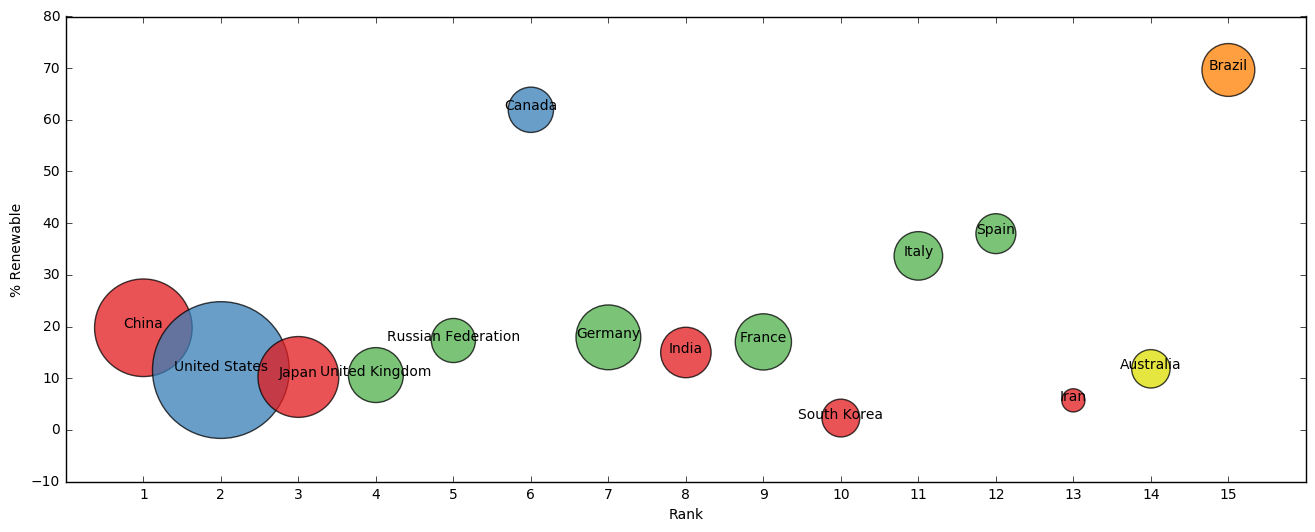

In [171]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!